
# Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
    1) KS
    
    2) AD
    
    3) KL
    
    I want you to use the scipy.stats package for this. For KS (Kolmogorov-Smirnoff) and AD (Anderson Darling) you simply need to generate the distribution against which you can test a normal (Gaussian) distribution: the KS and AD functions in scipy have functionality to test against standard distributions (normal, chisq etc) without you having to code up anything about the distribution itself. KL divergence test do not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import scipy.stats

** scipy.stats.kstest **:
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest

** scipy.stats.anderson **:
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

** scipy.stats.entropy **:
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

** scipy.stats.norm **:
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.norm.html

** numpy.histogram **:
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html

# 1. AD and KS test

I need to figure out what each test function returns. Let me run them once testing an obvious result: is a Gaussian Gaussian? I know the answer so this is a reality check to make sure I understand the output of the functions (and read the manual at the same time!)

I am testing a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial _w small np against a Gaussian model_. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

## KS test:
 ### null hypothesis is the two distributions are identical
 higher pvalue means the null hypothesis cannot be rejected
 
## AD test:
### null hypothesis is that a sample is drawn from a population that follows a particular distribution.
Critical values provided are for the following significance levels. If statistics is ** larger than ** these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution **can be rejected**.

normal/exponenential

15%, 10%, 5%, 2.5%, 1%

logistic

25%, 10%, 5%, 2.5%, 1%, 0.5%

Gumbel

25%, 10%, 5%, 2.5%, 1%




# 1.1 test for normal on normal

In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal: ", scipy.stats.kstest(dist_n,'norm'))
print("")
print ("normal on normal: ", scipy.stats.anderson(dist_n, dist='norm'))
print ("") 

normal on normal:  KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)

normal on normal:  AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



## KS: high p-value0.95, pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected
## AD: statistics = 0.26 is smaller than the 0.784 critical value (at alpha = 0.05): the H0 cannot be rejected.

## Result: a normal distribution (Gaussian, mean = 0, std = 1) is Gaussian

# 1.2 test for Poisson on normal

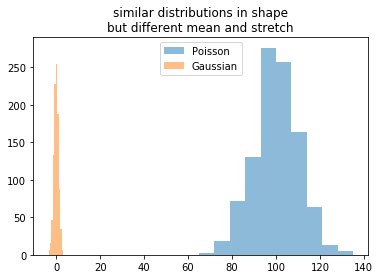

poisson on normal:  KstestResult(statistic=1.0, pvalue=0.0)

poisson on normal:  AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
plt.figure()
plt.hist(dist_p, alpha=0.5, label="Poisson")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions in shape\nbut different mean and stretch")
plt.show()
print ("poisson on normal: ", scipy.stats.kstest(dist_p,'norm'))
print('')
print ("poisson on normal: ", scipy.stats.anderson(dist_p, dist='norm'))


## KS: p = 0, H0 that sample comes from a Gaussian distribution can be rejected
## AD: AD statistics = 0.72 is smaller than the 0.784 critical value (at alpha = 0.05). H0 that sample comes from a Gaussian distribution cannot be rejected


## In this case the means are different, so the distributions will be different for KS and AD test. We need to normalize the poission

### to normalize the distribution X, it could be treated like: (X - X.mean())/X.std() 


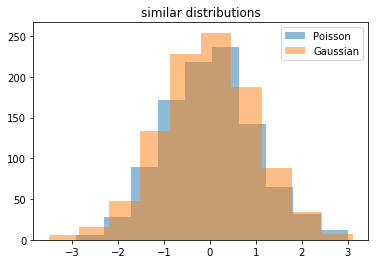

poisson vs normal:  KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)

poisson vs normal:  AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

thresh_0.05 =  0.784


In [4]:
dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
plt.figure()
plt.hist(dist_p, alpha=0.5, label="Poisson")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions")
plt.show()

print ("poisson vs normal: ", scipy.stats.kstest(dist_p,'norm'))
print('')
print ("poisson vs normal: ", scipy.stats.anderson(dist_p, dist='norm'))
print('')

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = ", threshold[0])



## KS: p = 0.3, no longer rejecting the H0 at alpha=0.05
## AD: statistics AD=0.93 larger than threshold 0.784 (at alpha=0.05), rejecting the H0
## the results of KS and AD test  are still different

## Result:  a Poisson with small lambda(100) is a bit like, but  still not so Gaussian


# 1.3 test for binomial on normal

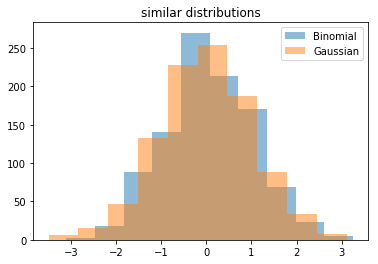

binomial vs normal:  KstestResult(statistic=0.049648705394760739, pvalue=0.013959864431395186)

binomial vs normal:  AndersonResult(statistic=1.1765054979813385, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [5]:
#binomial mean=np, stdev=sqrt(np(1-p))
n, p = 200, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))  #subtract mean divide by stdev
plt.figure()
plt.hist(dist_b, alpha=0.5, label="Binomial")
plt.hist(dist_n, alpha=0.5, label="Gaussian")
plt.legend()
plt.title("similar distributions")
plt.show()

print ("binomial vs normal: ", scipy.stats.kstest(dist_b,'norm'))
print('')
print ("binomial vs normal: ", scipy.stats.anderson(dist_b, dist='norm'))


## KS: p = 0.034, rejecting the H0 at alpha=0.05
## AD: statistics AD=1.22 larger than threshold 0.784 (at alpha=0.05), rejecting the H0


## Result:  a binomial  with small np(np = 100) is NOT Gaussian



## Recap:
** H0 hypothesis**

- KS test: the two distributions are identical;  

- AD test: a sample come from a particular distribution



KS test: higher pvalue than significant level (like ** alpha = 0.05 **) means the null hypothesis that the two distributions are identical cannot be rejected


AD test: If AD statistics is ** larger than ** critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution **can be rejected**.

** for comparing with normal distribution, critical value =  0.784 at alpha = 0.05 ** 
 


# 2. KL DIVERGENCE

The KL divergence is a little trickier: 

__ empirical distribution__ 
it wants to know the distribution _y_ value at a location _x_.  have to pass it the values of the _distribution_ at some x's, not my histogram though, si I need a  **NORMALIZED HOSTOGRAM OF MY DISTRIBUTION**, i.e. derive a probability distribution function (PDF) from the data. 

__model__
Then I have to pass it a function for my comparison distribution evaluated at the same _x_-values where my empirical distribution is evaluated (not just the name of a distribution like for KS and AD)

### scipy.stats.entropy
(pk, qk=None, base=None)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy

pk : sequence
Defines the (discrete) distribution. pk[i] is the (possibly unnormalized) probability of event i.

qk : sequence, optional
Sequence against which the relative entropy is computed. 

** qk Should be in the same format as pk**.

If only probabilities pk are given, the entropy is calculated as S = -sum(pk * log(pk), axis=0).

If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=0).





In [6]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers

distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest


### np.histogram: 
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html
#### bins: 
If bins is an int, it defines the number of equal-width bins in the given range (10, by default). If bins is a sequence, it defines the bin edges, including the rightmost edge, allowing for non-uniform bin widths.
#### density: 
If False, the result will contain the number of samples in each bin. If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not a probability mass function.

In [7]:
print('distribution of normal: ', distpdf_n)
print('bins of normal: ', mybins_n)
print('')

print('distribution of poisson: ', distpdf_p)
print('bins of poisson: ', mybins_p)
print('')

print('distribution of binomial: ', distpdf_b)
print('bins of binomial: ', mybins_b)
print('')

distribution of normal:  [ 0.00906321  0.02416857  0.07099518  0.20090125  0.34440214  0.38367606
  0.28247017  0.13292714  0.05135821  0.01057375]
bins of normal:  [-3.50760164 -2.84558484 -2.18356804 -1.52155124 -0.85953444 -0.19751764
  0.46449916  1.12651596  1.78853276  2.45054955  3.11256635]

distribution of poisson:  [ 0.01016949  0.04745763  0.15084746  0.29152542  0.36949153  0.4
  0.24067797  0.11016949  0.05423729  0.02033898]
bins of poisson:  [-2.9  -2.31 -1.72 -1.13 -0.54  0.05  0.64  1.23  1.82  2.41  3.  ]

distribution of binomial:  [ 0.0031427   0.02828427  0.13827866  0.21998878  0.42426407  0.33626856
  0.26870058  0.10842304  0.03614101  0.00785674]
bins of binomial:  [-3.11126984 -2.47487373 -1.83847763 -1.20208153 -0.56568542  0.07071068
  0.70710678  1.34350288  1.97989899  2.61629509  3.25269119]



then i have to pass it the functional form of a normal PDF, which is returned by the function scipy.stats.norm for example (a google search would have told you!) 
evaluated at the bin centers of the histogram from before

### scipy.stats.norm:  

A normal continuous random variable.
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.norm.html

** scipy.stats.norm.pdf ** is the probability density function

In [8]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy"')
print('')
print ("Entropy of normal on normal: ", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("Entropy of poisson on normal: ", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("Entropy of binomial on normal: ", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy"

Entropy of normal on normal:  0.00527211066212
Entropy of poisson on normal:  0.00523311596851
Entropy of binomial on normal:  0.013732307361


## the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=0)

## the scipy.stats.entropy returns the entropy value S, to evaluate the divergence of two distributions. 
## Larger entropy means more difference between the distributions.

## Entropy values of normal on normal and poisson on normal are pretty low(~0.005), while entropy of binomial on normal (0.068) is much higher.
## It proves that a binomial  with small np(np = 100) is NOT Gaussian




# 3. increase the means to make binomial and poisson more normal

## 3.1 BINOMIAL

with the binomial distribution I can change n*p. larger n*p will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as the value of n*p increases.

In [9]:
narray = np.linspace(1, 1001, num = 101)

In [10]:
#loop over the different values of n (or n and p)
ks_s_b= []
ks_p_b = []
ad_b = []
kl_b = []
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    
    #run ks tests 
    kstest = scipy.stats.kstest(dist,'norm')
    ks_s_b.append(kstest[0])
    ks_p_b.append(kstest[1])
    
    #run ad test
    adtest = scipy.stats.anderson(dist, dist='norm')
    ad_b.append(adtest[0])
  
    # for KL I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    entropy = scipy.stats.entropy(np.histogram(dist, bins=mybins, density = True)[0] / 1000., 
                                  scipy.stats.norm.pdf(bincenters))
    
    kl_b.append(entropy)  

You want to see how the p-value (or the test statistics) behaves as a function of increasing n*p.
So you can plot the p-value (or the test statistics) against the n*p

think about how the captions are written in the paper  you have to read for last week assignment: a caption must describe the plot sufficiently well that I do not need to read the paper to understand it. 

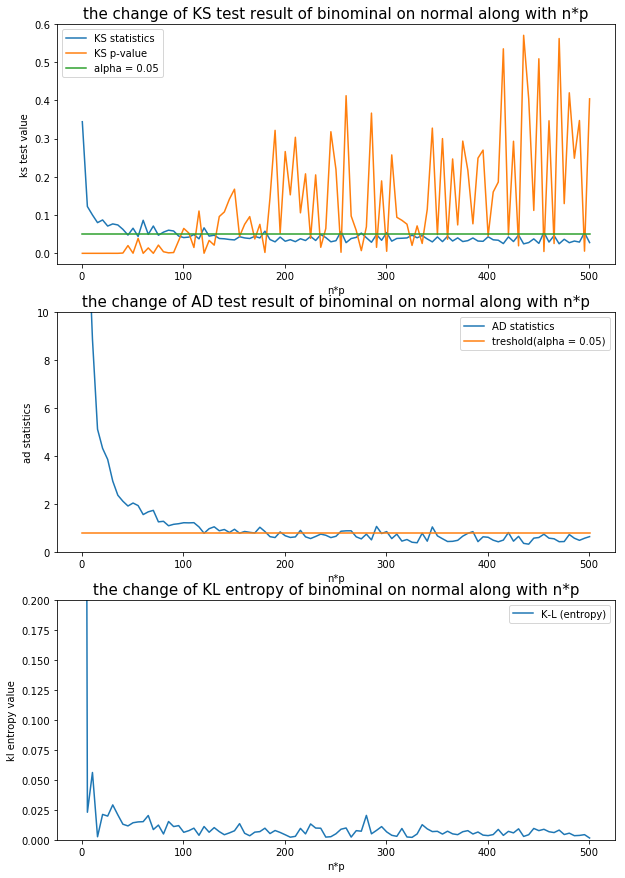

In [11]:
x = narray*0.5

fig = plt.figure(figsize = (10,15))
fig.add_subplot(311)
plt.plot(x, ks_s_b, label='KS statistics')
plt.plot(x, ks_p_b, label='KS p-value')
plt.plot([x[0], x[-1]],[0.05, 0.05], label="alpha = 0.05")
plt.legend()
plt.xlabel('n*p')
plt.ylabel('ks test value')
plt.title('the change of KS test result of binominal on normal along with n*p', fontsize = 15)

fig.add_subplot(312)
plt.plot(x, ad_b,  label='AD statistics')
plt.plot([x[0], x[-1]],[0.784, 0.784], label="treshold(alpha = 0.05)")
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.legend()
plt.xlabel('n*p')
plt.ylabel('ad statistics')
plt.title('the change of AD test result of binominal on normal along with n*p', fontsize = 15)

fig.add_subplot(313)
plt.plot(x, kl_b, label='K-L (entropy)')
plt.ylim(0,0.2)
plt.legend()
plt.xlabel('n*p')
plt.ylabel('kl entropy value')
plt.title('the change of KL entropy of binominal on normal along with n*p', fontsize = 15)

## From the plots above, we could see: 
### (1) ks test
- ks test null hypothesis is the two distributions are identical
- as the increase of n*p, ks test pvalue is more likely > 0.05, which means H0 that sample comes from a Gaussian distribution cannot be rejected

### (2) ad test
- ad test null hypothesis is that a sample is drawn from a population that follows a particular distribution
- If statistics is ** larger than ** these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution **can be rejected**.
- for significant level 0.05, critical value is 0.784
- as the increase of n*p, ad statistics is more likely smaller than critical value 0.784 for alpha = 0.05, the H0 cannot be rejected.


### (3) kl divergence
- as the increase of n*p, entropy values gets smaller, which means less difference between binomial and normal distribution 

## Conclusion: binomial distribution is more Gaussians as the mean of the distribution increases.

## 3.2 POISSON

with the poisson distribution I can change lambda. larger lambda will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as the value of n*p increases.

In [12]:
#loop over the different values of n (i.e. lambda)
ks_s_p= []
ks_p_p = []
ad_p = []
kl_p = []
for i,n in enumerate(narray):
    #generate the distribution
    dist = (np.random.poisson(n, 1000) - n ) / np.sqrt(n)
    
    #run ks tests 
    kstest = scipy.stats.kstest(dist,'norm')
    ks_s_p.append(kstest[0])
    ks_p_p.append(kstest[1])
    
    #run ad test
    adtest = scipy.stats.anderson(dist, dist='norm')
    ad_p.append(adtest[0])
  
    # for KL I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    entropy = scipy.stats.entropy(np.histogram(dist, bins=mybins, density = True)[0] / 1000., 
                                  scipy.stats.norm.pdf(bincenters))
    
    kl_p.append(entropy) 

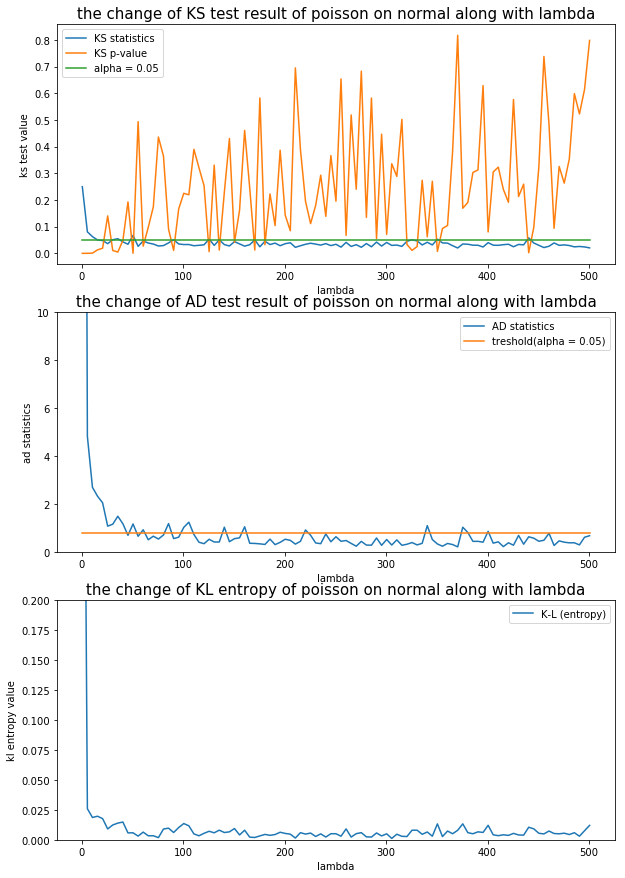

In [13]:
x = narray*0.5

fig = plt.figure(figsize = (10,15))
fig.add_subplot(311)
plt.plot(x, ks_s_p, label='KS statistics')
plt.plot(x, ks_p_p, label='KS p-value')
plt.plot([x[0], x[-1]],[0.05, 0.05], label="alpha = 0.05")
plt.legend()
plt.xlabel('lambda')
plt.ylabel('ks test value')
plt.title('the change of KS test result of poisson on normal along with lambda', fontsize = 15)

fig.add_subplot(312)
plt.plot(x, ad_p,  label='AD statistics')
plt.plot([x[0], x[-1]],[0.784, 0.784], label="treshold(alpha = 0.05)")
plt.ylim(0,10) #limit the y range or you cannot see the relevant part
plt.legend()
plt.xlabel('lambda')
plt.ylabel('ad statistics')
plt.title('the change of AD test result of poisson on normal along with lambda', fontsize = 15)

fig.add_subplot(313)
plt.plot(x, kl_p, label='K-L (entropy)')
plt.ylim(0,0.2)
plt.legend()
plt.xlabel('lambda')
plt.ylabel('kl entropy value')
plt.title('the change of KL entropy of poisson on normal along with lambda', fontsize = 15)

## From the plots above, we could see: 
### (1) ks test
- ks test null hypothesis is the two distributions are identical
- as the increase of n*p, ks test pvalue is more likely > 0.05, which means H0 that sample comes from a Gaussian distribution cannot be rejected

### (2) ad test
- ad test null hypothesis is that a sample is drawn from a population that follows a particular distribution
- If statistics is ** larger than ** these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution **can be rejected**.
- for significant level 0.05, critical value is 0.784
- as the increase of n*p, ad statistics is more likely smaller than critical value 0.784 for alpha = 0.05, the H0 cannot be rejected.


### (3) kl divergence
- as the increase of n*p, entropy values gets smaller, which means less difference between binomial and normal distribution 

## Conclusion2: poisson distribution is more Gaussians as the mean of the distribution increases.

# CONCLUSION OF THIS HOMEWORK:  
** binomial and Poisson distribution look increasingly more similar to Gaussians as the mean of the distribution increases.**

# the homework ends here 